### Basics

In [27]:
import math, numpy, torch
from matplotlib import pyplot as plt

# Make a vector of 101 equally spaced numbers from 0 to 5.
x = torch.linspace(0, 5, 101)

# Print the first five things in x.
print(x[:5])

# printing the last five things in x
print(x[-5:])

tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000])
tensor([4.8000, 4.8500, 4.9000, 4.9500, 5.0000])


The shape of x is torch.Size([101])
The shape of y1=x.sin() is torch.Size([101])
The shape of y2=x ** x.cos() is torch.Size([101])
The shape of y3=y2 - y1 is torch.Size([101])
The shape of y4=y3.min() is torch.Size([]), a zero-d scalar


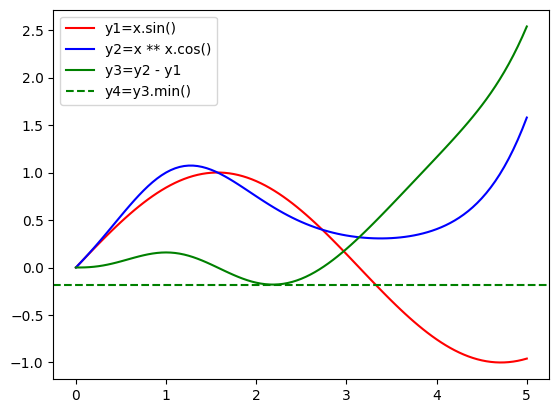

In [28]:
# Do some vector computations.
y1 = x.sin()
y2 = x ** x.cos()
y3 = y2 - y1
y4 = y3.min()

# Print and plot some answers.
print(f'The shape of x is {x.shape}')
print(f'The shape of y1=x.sin() is {y1.shape}')
print(f'The shape of y2=x ** x.cos() is {y2.shape}')
print(f'The shape of y3=y2 - y1 is {y3.shape}')
print(f'The shape of y4=y3.min() is {y4.shape}, a zero-d scalar')

plt.plot(x, y1, 'red', x, y2, 'blue', x, y3, 'green')
plt.axhline(y4, color='green', linestyle='--')
plt.legend(['y1=x.sin()', 'y2=x ** x.cos()', 'y3=y2 - y1', 'y4=y3.min()'])
plt.show()

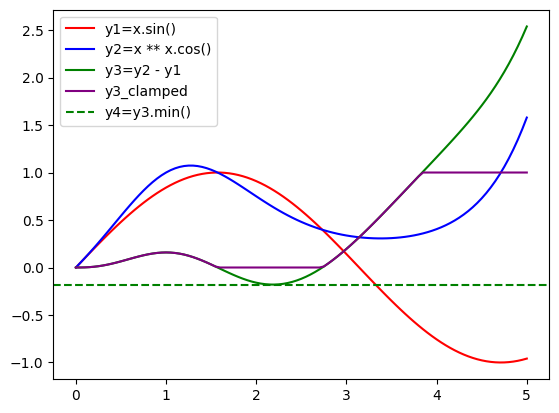

In [29]:
# plotting y3 clamped between 0.0 and 1.0
y3_clamped = y3.clamp(0.0, 1.0)
plt.plot(x, y1, 'red', x, y2, 'blue', x, y3, 'green', x, y3_clamped, 'purple')
plt.axhline(y4, color='green', linestyle='--')
plt.legend(['y1=x.sin()', 'y2=x ** x.cos()', 'y3=y2 - y1', 'y3_clamped', 'y4=y3.min()'])
plt.show()

In [31]:
# Slicing examples with print statements.

# Let's create a 4D tensor to demonstrate slicing.
x4d = torch.arange(3*4*5*6).reshape(3,4,5,6)
print("x4d.shape:", x4d.shape)

# Example 1: Using x[2,0,1,5] (changed from 9 to 5 since dimension 3 has size 6, so valid indices are 0-5)
print("x4d[2,0,1,5]:", x4d[2,0,1,5].item())

# Example 2: Using x[0:3,2,:,:]
print("x4d[0:3,2,:,:].shape:", x4d[0:3,2,:,:].shape)
print("x4d[0:3,2,:,:]:\n", x4d[0:3,2,:,:])

x4d.shape: torch.Size([3, 4, 5, 6])
x4d[2,0,1,5]: 251
x4d[0:3,2,:,:].shape: torch.Size([3, 5, 6])
x4d[0:3,2,:,:]:
 tensor([[[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[180, 181, 182, 183, 184, 185],
         [186, 187, 188, 189, 190, 191],
         [192, 193, 194, 195, 196, 197],
         [198, 199, 200, 201, 202, 203],
         [204, 205, 206, 207, 208, 209]],

        [[300, 301, 302, 303, 304, 305],
         [306, 307, 308, 309, 310, 311],
         [312, 313, 314, 315, 316, 317],
         [318, 319, 320, 321, 322, 323],
         [324, 325, 326, 327, 328, 329]]])


In [38]:
# Make an array of normally distributed randoms.
m = torch.randn(2, 5).abs()
print(f'm is: \n{m}, \n')
print(f'm[1,2] is: {m[1,2]}\n')
print(f'm.shape is {m.shape}\n')
print(f'column zero, m[:,0] is {m[:,0]}\n')
print(f'row zero m[0,:] is {m[0,:]}\n')
dot_product = (m[0,:] * m[1,:]).sum()
print(f'The dot product of rows (m[0,:] * m[1,:]).sum() is {dot_product}\n')
outer_product = m[0,:][None,:] * m[1,:][:,None]
print(f'The outer product of rows m[0,:][None,:] * m[1,:][:,None] is:\n{outer_product}')

m is: 
tensor([[0.1670, 1.9060, 0.2410, 0.2241, 0.5281],
        [0.4876, 1.0405, 1.0449, 0.3465, 0.4511]]), 

m[1,2] is: 1.044919729232788

m.shape is torch.Size([2, 5])

column zero, m[:,0] is tensor([0.1670, 0.4876])

row zero m[0,:] is tensor([0.1670, 1.9060, 0.2410, 0.2241, 0.5281])

The dot product of rows (m[0,:] * m[1,:]).sum() is 2.6324641704559326

The outer product of rows m[0,:][None,:] * m[1,:][:,None] is:
tensor([[0.0814, 0.9293, 0.1175, 0.1093, 0.2575],
        [0.1738, 1.9833, 0.2508, 0.2332, 0.5495],
        [0.1745, 1.9917, 0.2518, 0.2342, 0.5519],
        [0.0579, 0.6604, 0.0835, 0.0777, 0.1830],
        [0.0753, 0.8598, 0.1087, 0.1011, 0.2382]])


/tmp/ipykernel_107310/3993958968.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


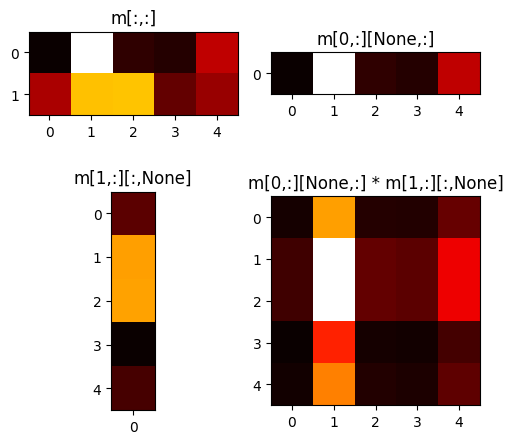

In [39]:
# plot graph

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5, 5), dpi=100)
def color_mat(ax, m, title):
    ax.set_title(title)
    ax.imshow(m, cmap='hot', vmax=1.5, interpolation='nearest')
    ax.get_xaxis().set_ticks(range(m.shape[1]))
    ax.get_yaxis().set_ticks(range(m.shape[0]))
color_mat(ax1, m, 'm[:,:]')
color_mat(ax2, m[0,:][None,:], 'm[0,:][None,:]')
color_mat(ax3, m[1,:][:,None], 'm[1,:][:,None]')
color_mat(ax4, outer_product, 'm[0,:][None,:] * m[1,:][:,None]')
fig.tight_layout()
fig.show()

In [ ]:
# Use torch.mm to compute outer_product and dot_product.

outer_1 = torch.mm(m[0,:][None,:], m[1,:][:,None])
print(outer_1)
outer_2 = torch.mm(m[1,:][:,None], m[0,:][None,:])
print(outer_2)
print(outer_1 == outer_2)

dot_1 = m[0,:][None,:] * m[1,:][:,None]
print(dot_1)
dot_2 = m[1,:][:,None] * m[0,:][None,:]
print(dot_2)
print(dot_1 == dot_2)

# Order matters when using torch.mm but not when using * because * is element-wise multiplication whereas torch.mm is matrix multiplication.

tensor([[2.6325]])
tensor([[0.0814, 0.9293, 0.1175, 0.1093, 0.2575],
        [0.1738, 1.9833, 0.2508, 0.2332, 0.5495],
        [0.1745, 1.9917, 0.2518, 0.2342, 0.5519],
        [0.0579, 0.6604, 0.0835, 0.0777, 0.1830],
        [0.0753, 0.8598, 0.1087, 0.1011, 0.2382]])
tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])
tensor([[0.0814, 0.9293, 0.1175, 0.1093, 0.2575],
        [0.1738, 1.9833, 0.2508, 0.2332, 0.5495],
        [0.1745, 1.9917, 0.2518, 0.2342, 0.5519],
        [0.0579, 0.6604, 0.0835, 0.0777, 0.1830],
        [0.0753, 0.8598, 0.1087, 0.1011, 0.2382]])
tensor([[0.0814, 0.9293, 0.1175, 0.1093, 0.2575],
        [0.1738, 1.9833, 0.2508, 0.2332, 0.5495],
        [0.1745, 1.9917, 0.2518, 0.2342, 0.5519],
        [0.0579, 0.6604, 0.0835, 0.0777, 0.1830],
        [0.0753, 0.8598, 0.1087, 0.1011, 0.2382]])
te

time using the CPU alone: 4.04 seconds
time using GPU, moving data from CPU: 0.466 seconds
time using GPU on pinned CPU memory: 0.219 seconds
time using the GPU alone: 0.109 seconds


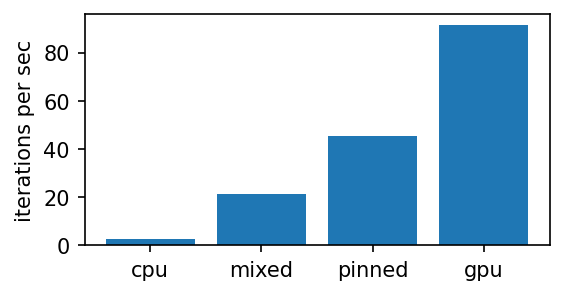

Your GPU is 36.9x faster than CPU but only 8.68x if data is repeatedly copied from the CPU
When copying from pinned memory, speedup is 18.4x
Numerical differences between GPU and CPU: 6.089593398428406e-07


In [45]:
import time

# Here is a demonstration of moving data between GPU and CPU.
# We multiply a batch of vectors through a big linear opeation 10 times
r = torch.randn(1024, 1024, dtype=torch.float)
x = torch.randn(32768, 1024, dtype=r.dtype)
iterations = 10

def time_iterated_mm(x, matrix):
    start = time.time()
    result = 0
    for i in range(iterations):
        result += torch.mm(matrix, x.to(matrix.device).t())
    torch.cuda.synchronize()
    elapsed = time.time() - start
    return elapsed, result.cpu()

cpu_time, cpu_result = time_iterated_mm(x.cpu(), r.cpu())
print(f'time using the CPU alone: {cpu_time:.3g} seconds')

mixed_time, mixed_result = time_iterated_mm(x.cpu(), r.cuda())
print(f'time using GPU, moving data from CPU: {mixed_time:.3g} seconds')

pinned_time, pinned_result = time_iterated_mm(x.cpu().pin_memory(), r.cuda())
print(f'time using GPU on pinned CPU memory: {pinned_time:.3g} seconds')

gpu_time, gpu_result = time_iterated_mm(x.cuda(), r.cuda())
print(f'time using the GPU alone: {gpu_time:.3g} seconds')

plt.figure(figsize=(4,2), dpi=150)
plt.ylabel('iterations per sec')
plt.bar(['cpu', 'mixed', 'pinned', 'gpu'],
        [iterations/cpu_time,
         iterations/mixed_time,
         iterations/pinned_time,
         iterations/gpu_time])
plt.show()

print(f'Your GPU is {cpu_time / gpu_time:.3g}x faster than CPU'
      f' but only {cpu_time / mixed_time:.3g}x if data is repeatedly copied from the CPU')
print(f'When copying from pinned memory, speedup is {cpu_time / pinned_time:.3g}x')
print(f'Numerical differences between GPU and CPU: {(cpu_result - gpu_result).norm() / cpu_result.norm()}')

time using the CPU alone: 5.59 seconds
time using GPU, moving data from CPU: 3.99 seconds
time using GPU on pinned CPU memory: 3.57 seconds
time using the GPU alone: 3.38 seconds


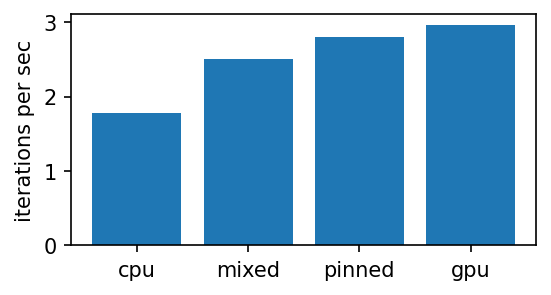

Your GPU is 1.66x faster than CPU but only 1.4x if data is repeatedly copied from the CPU
When copying from pinned memory, speedup is 1.56x
Numerical differences between GPU and CPU: 1.8269246279488982e-17


In [ ]:
import time

# Using double
# Here is a demonstration of moving data between GPU and CPU.
# We multiply a batch of vectors through a big linear opeation 10 times
r = torch.randn(1024, 1024, dtype=torch.double)
x = torch.randn(32768, 1024, dtype=r.dtype)
iterations = 10

def time_iterated_mm(x, matrix):
    start = time.time()
    result = 0
    for i in range(iterations):
        result += torch.mm(matrix, x.to(matrix.device).t())
    torch.cuda.synchronize()
    elapsed = time.time() - start
    return elapsed, result.cpu()

cpu_time, cpu_result = time_iterated_mm(x.cpu(), r.cpu())
print(f'time using the CPU alone: {cpu_time:.3g} seconds')

mixed_time, mixed_result = time_iterated_mm(x.cpu(), r.cuda())
print(f'time using GPU, moving data from CPU: {mixed_time:.3g} seconds')

pinned_time, pinned_result = time_iterated_mm(x.cpu().pin_memory(), r.cuda())
print(f'time using GPU on pinned CPU memory: {pinned_time:.3g} seconds')

gpu_time, gpu_result = time_iterated_mm(x.cuda(), r.cuda())
print(f'time using the GPU alone: {gpu_time:.3g} seconds')

plt.figure(figsize=(4,2), dpi=150)
plt.ylabel('iterations per sec')
plt.bar(['cpu', 'mixed', 'pinned', 'gpu'],
        [iterations/cpu_time,
         iterations/mixed_time,
         iterations/pinned_time,
         iterations/gpu_time])
plt.show()

print(f'Your GPU is {cpu_time / gpu_time:.3g}x faster than CPU'
      f' but only {cpu_time / mixed_time:.3g}x if data is repeatedly copied from the CPU')
print(f'When copying from pinned memory, speedup is {cpu_time / pinned_time:.3g}x')
print(f'Numerical differences between GPU and CPU: {(cpu_result - gpu_result).norm() / cpu_result.norm()}')

In [59]:
# Use torch.randn to create a four-dimensional tensor x of size (2,3,4,5), which could store two 5x4 RGB images.

# Then print three things:

# print x.
# Use x.permute to switch the horizontal and vertical (last two) dimensions.
# Use x.view to see each image as a flat vector of 60 numbers.

# TODO make x of size (2,3,4,5), and print three rearrangements of x
x = torch.randn(2,3,4,5)
print("x.shape is:", x.shape, "\n")
print("x is: \n", x, "\n")
print("x.permute(0,1,3,2) is: \n", x.permute(0,1,3,2), "\n")
print("x.view(2,3,20) is: \n", x.view(2,3,20), "\n")

x.shape is: torch.Size([2, 3, 4, 5]) 

x is: 
 tensor([[[[ 8.8710e-01, -1.6741e+00, -2.2788e+00, -7.2930e-01, -1.9307e+00],
          [-1.2367e+00,  5.0325e-01, -4.0005e-01, -1.4634e+00, -1.1260e+00],
          [-4.8621e-01, -4.9241e-02,  6.3726e-02,  5.0431e-01,  8.9912e-01],
          [ 1.3937e+00, -3.2041e-02,  9.0505e-01,  4.4356e-02, -3.1130e-01]],

         [[-1.1760e+00, -6.8081e-01, -2.9924e-01, -1.6009e+00,  1.0971e+00],
          [-8.8761e-01,  4.1418e-01,  2.0751e-01, -7.9835e-01,  7.6681e-01],
          [ 3.7603e-01, -8.2421e-01,  3.1523e-01,  1.6901e-01,  5.6257e-01],
          [ 1.0602e+00,  1.0747e+00,  1.5471e+00, -1.3937e-01, -5.4245e-02]],

         [[-4.8430e-01,  1.2681e+00,  3.1240e-01,  1.2116e+00, -1.0137e+00],
          [ 3.1870e-01, -2.9067e-01, -4.0082e-01,  1.4229e+00, -1.1461e+00],
          [ 1.8607e-01,  2.3244e+00,  8.2714e-01, -1.5438e+00,  4.3885e-02],
          [-7.2871e-01, -2.1589e+00,  2.0637e-01, -6.6130e-02,  3.0911e-03]]],


        [[[-5.8415e-0

In [58]:
A = torch.randn(2,5)
B = torch.randn(5,3)

# Uncomment to see ordinary matrix multiplication
print("torch.mm(A, B) is: \n", torch.mm(A, B), "\n")

# Ordinary matrix multiplication written as an einsum
print("torch.einsum('ij, jk -> ik', A, B) is: \n", torch.einsum('ij, jk -> ik', A, B))

torch.mm(A, B) is: 
 tensor([[ 0.9730, -1.5845,  0.5909],
        [-1.6121, -1.8540,  2.1552]]) 

torch.einsum('ij, jk -> ik', A, B) is: 
 tensor([[ 0.9730, -1.5845,  0.5909],
        [-1.6121, -1.8540,  2.1552]])


In [61]:
# Make A in the shape (5, 6, 2) and B in the shape (5, 6, 3); we can think of A as a 5x6 grid of 2-dimensional vectors and B as a 5x6 of 3-dimesnsional vectors.

# Covariances (un-normalized) of vectors in A and B could be computed by flattening and transposing the tensors into (2,30) and (30,3) matrices and then doing a matrix multiplication of these batches as follows:

# print(torch.mm(A.reshape(30, 2).t(), B.reshape(30, 3)))
# Instead use einsum to compute the same thing.

# TODO: use einsum to compute a covariance statistic over vectors in A and B.
A = torch.randn(5,6,2)
B = torch.randn(5,6,3)


print("A.shape is:", A.shape, "\n")
print("B.shape is:", B.shape, "\n")

print("torch.mm(A.reshape(30, 2).t(), B.reshape(30, 3)) is: \n", torch.mm(A.reshape(30, 2).t(), B.reshape(30, 3)), "\n")
print("torch.einsum('ijl, ijk -> lk', A, B) is: \n", torch.einsum('ijl, ijk -> lk', A, B), "\n")

A.shape is: torch.Size([5, 6, 2]) 

B.shape is: torch.Size([5, 6, 3]) 

torch.mm(A.reshape(30, 2).t(), B.reshape(30, 3)) is: 
 tensor([[ 1.1150,  3.4041,  1.2813],
        [ 6.0786, 11.7754, -0.9317]]) 

torch.einsum('ijl, ijk -> lk', A, B) is: 
 tensor([[ 1.1150,  3.4041,  1.2813],
        [ 6.0786, 11.7754, -0.9317]]) 

